In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv("HR-Employee-Attrition.csv")

In [23]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

In [22]:
# Drop irrelevant or constant columns
df = df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"])

In [24]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [26]:
# Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8809523809523809

Confusion Matrix:
 [[254   1]
 [ 34   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



In [33]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [44]:
# Feature importance
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features for Attrition Prediction")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

Accuracy: 0.8741496598639455

Confusion Matrix:
 [[253   2]
 [ 35   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



C:\Users\User\AppData\Local\Temp\ipykernel_6520\2885381384.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")


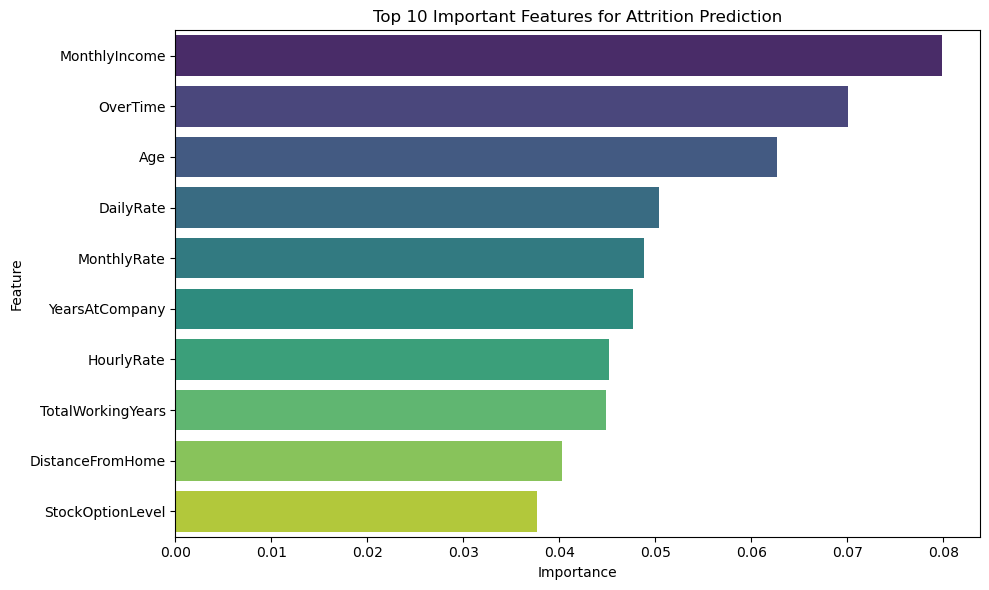

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Drop irrelevant columns
df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with class balancing
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features for Attrition Prediction")
plt.tight_layout()
plt.show()


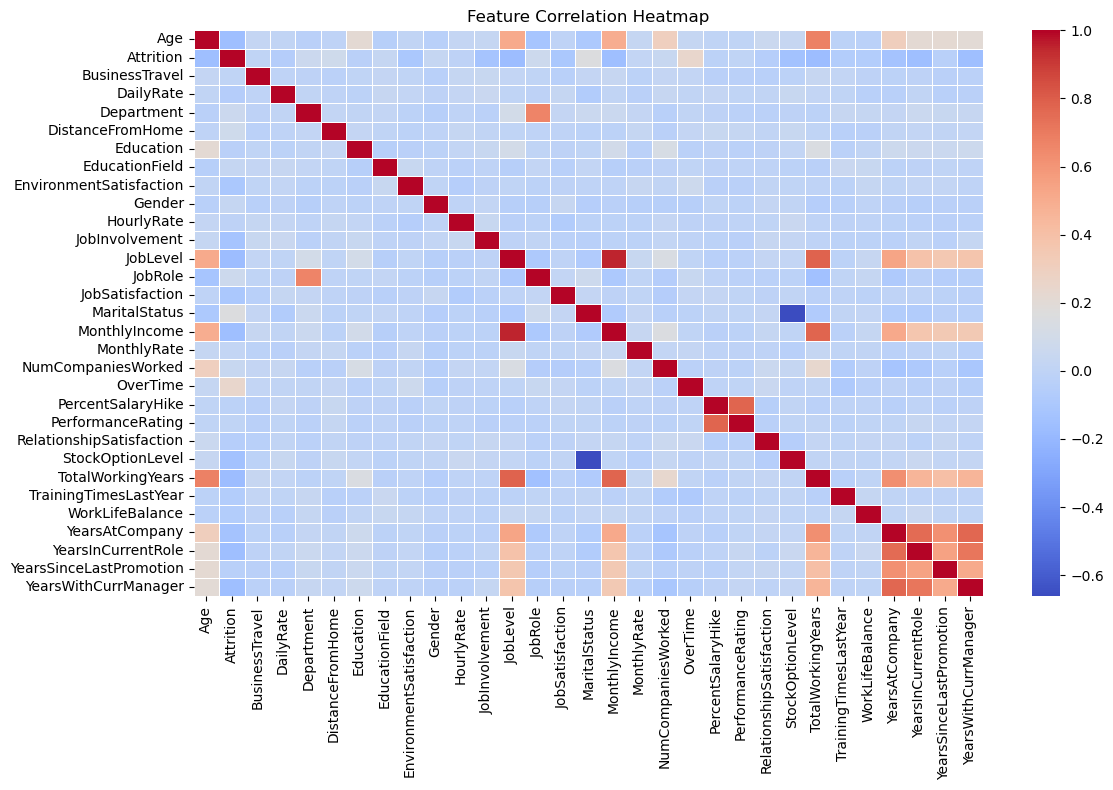

Accuracy: 0.8367346938775511
ROC-AUC: 0.7573865104660178

Confusion Matrix:
 [[242   5]
 [ 43   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



C:\Users\User\AppData\Local\Temp\ipykernel_6520\2954222131.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")


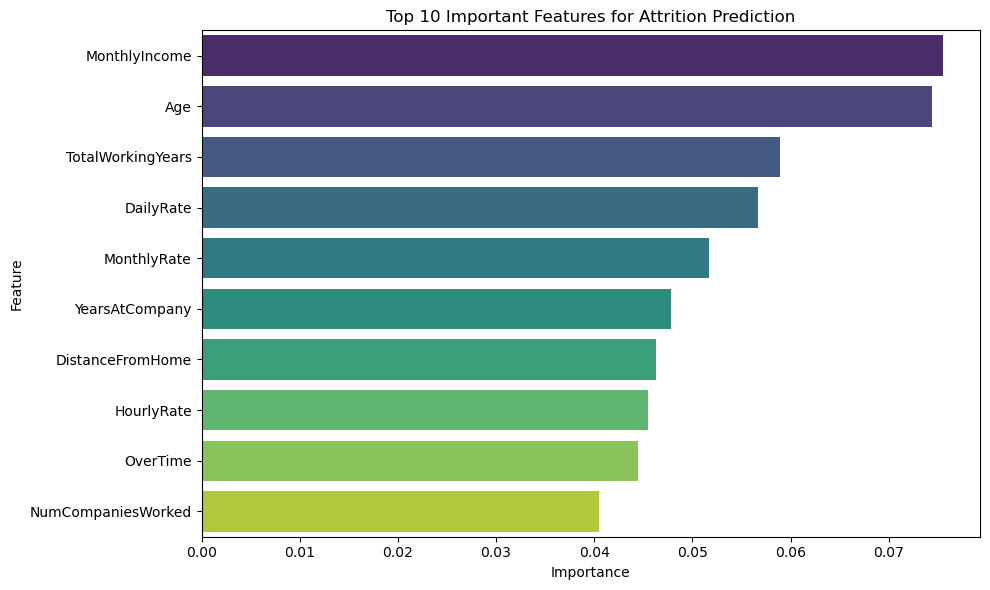

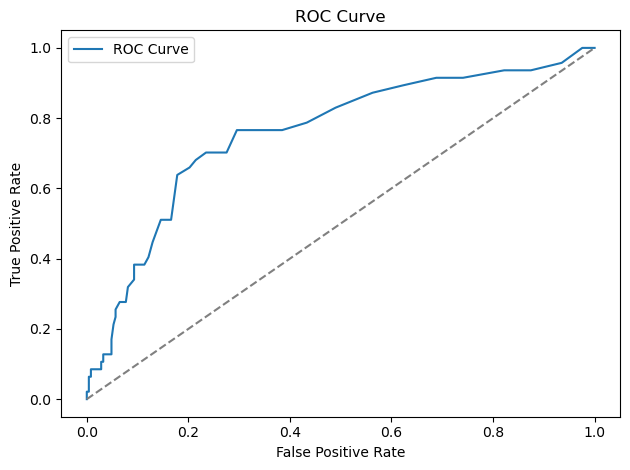

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Load and preprocess data
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)

    # Drop irrelevant columns
    df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"], inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include="object").columns:
        df[col] = le.fit_transform(df[col])

    return df

# Train and evaluate model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)
    return model

# Plot feature importances
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feat_df = feat_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 Important Features for Attrition Prediction")
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap
def plot_correlation(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Plot ROC Curve
def plot_roc(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main workflow
df = load_and_prepare_data("HR-Employee-Attrition.csv")

# Plot correlation heatmap
plot_correlation(df)

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = train_model(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visuals
plot_feature_importance(model, X.columns)
plot_roc(model, X_test, y_test)


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess
df = pd.read_csv("HR-Employee-Attrition.csv")

# Drop unused columns
df = df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"])

# Label encode
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Use only top 5 features + target
selected_features = ['OverTime', 'MonthlyIncome', 'Age', 'JobRole', 'TotalWorkingYears']
X = df[selected_features]
y = df["Attrition"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Show predictions with probabilities for a few real rows
X_test_copy = X_test.copy()
X_test_copy["Attrition_Actual"] = y_test.values
X_test_copy["Attrition_Predicted"] = y_pred
X_test_copy["Attrition_Probability"] = model.predict_proba(X_test)[:, 1]

# Show top 10 high-risk employees
high_risk = X_test_copy.sort_values(by="Attrition_Probability", ascending=False).head(10)
print("\nTop 10 High-Risk Attrition Predictions:")
print(high_risk[['OverTime', 'MonthlyIncome', 'Age', 'JobRole', 'TotalWorkingYears', 'Attrition_Actual', 'Attrition_Predicted', 'Attrition_Probability']])


Accuracy: 0.8061224489795918

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       247
           1       0.29      0.15      0.20        47

    accuracy                           0.81       294
   macro avg       0.57      0.54      0.54       294
weighted avg       0.76      0.81      0.78       294


Top 10 High-Risk Attrition Predictions:
      OverTime  MonthlyIncome  Age  JobRole  TotalWorkingYears  \
17           1           2935   22        2                  1   
1061         0           2033   24        8                  1   
41           0           2341   27        2                  1   
911          1           1118   25        8                  1   
688          1           2121   19        8                  1   
1402         1           1129   31        2                  1   
476          0           2127   24        2                  1   
655          1           2277   33        1       

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)

    # Drop irrelevant columns
    df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"], inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col])

    return df

# Train and evaluate classification model
def train_classification_model(X, y, model_name="Model"):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Train
    model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Results
    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

# Load and prepare data
df = load_and_prepare_data("HR-Employee-Attrition.csv")

# ----------- Attrition Prediction ----------- #
attrition_features = ['OverTime', 'MonthlyIncome', 'Age', 'JobRole', 'TotalWorkingYears']
X_attrition = df[attrition_features]
y_attrition = df['Attrition']

attrition_model = train_classification_model(X_attrition, y_attrition, "Attrition Prediction")

# ----------- Job Satisfaction Prediction ----------- #
satisfaction_features = ['Age', 'JobRole', 'OverTime', 'MonthlyIncome', 'YearsAtCompany', 'EnvironmentSatisfaction']
X_satisfaction = df[satisfaction_features]
y_satisfaction = df['JobSatisfaction']

satisfaction_model = train_classification_model(X_satisfaction, y_satisfaction, "Job Satisfaction Prediction")



=== Attrition Prediction ===
Accuracy: 0.8061224489795918
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       247
           1       0.29      0.15      0.20        47

    accuracy                           0.81       294
   macro avg       0.57      0.54      0.54       294
weighted avg       0.76      0.81      0.78       294


=== Job Satisfaction Prediction ===
Accuracy: 0.2653061224489796
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.10      0.13        58
           2       0.10      0.05      0.07        56
           3       0.30      0.42      0.35        88
           4       0.29      0.35      0.32        92

    accuracy                           0.27       294
   macro avg       0.22      0.23      0.22       294
weighted avg       0.24      0.27      0.24       294



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"], inplace=True)

    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col])
    return df

# Improved Job Satisfaction model training
def train_job_satisfaction_model(df):
    features = [
        'Age', 'JobRole', 'MonthlyIncome', 'TotalWorkingYears',
        'OverTime', 'YearsAtCompany', 'EnvironmentSatisfaction',
        'WorkLifeBalance', 'RelationshipSatisfaction', 'JobInvolvement'
    ]
    X = df[features]
    y = df["JobSatisfaction"]

    # Split with stratify to preserve class distribution
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }

    model = RandomForestClassifier(class_weight="balanced", random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("\n=== Improved Job Satisfaction Model ===")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return best_model

# Load and run
df = load_data("HR-Employee-Attrition.csv")
job_satisfaction_model = train_job_satisfaction_model(df)



=== Improved Job Satisfaction Model ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.2755102040816326
Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.12      0.15        58
           2       0.24      0.21      0.23        56
           3       0.30      0.40      0.34        88
           4       0.29      0.29      0.29        92

    accuracy                           0.28       294
   macro avg       0.26      0.26      0.25       294
weighted avg       0.27      0.28      0.27       294



In [1]:
#Linear Regression


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Drop irrelevant or constant columns
df = df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"])

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8809523809523809

Confusion Matrix:
 [[251   4]
 [ 31   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Drop irrelevant or constant columns
df = df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"])

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8707482993197279

Confusion Matrix:
 [[246   9]
 [ 29  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.53      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.71      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
